# Bike Sharing Assignment

## import all the libraries 

In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [348]:
# Read the DATASET
bike = pd.read_csv('day.csv')

# Data understanding
### understand each feature and the importance and how they can impact the target variable. Which are independent variable and dependent variable so on

In [349]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [350]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [351]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [352]:
bike.shape

(730, 16)

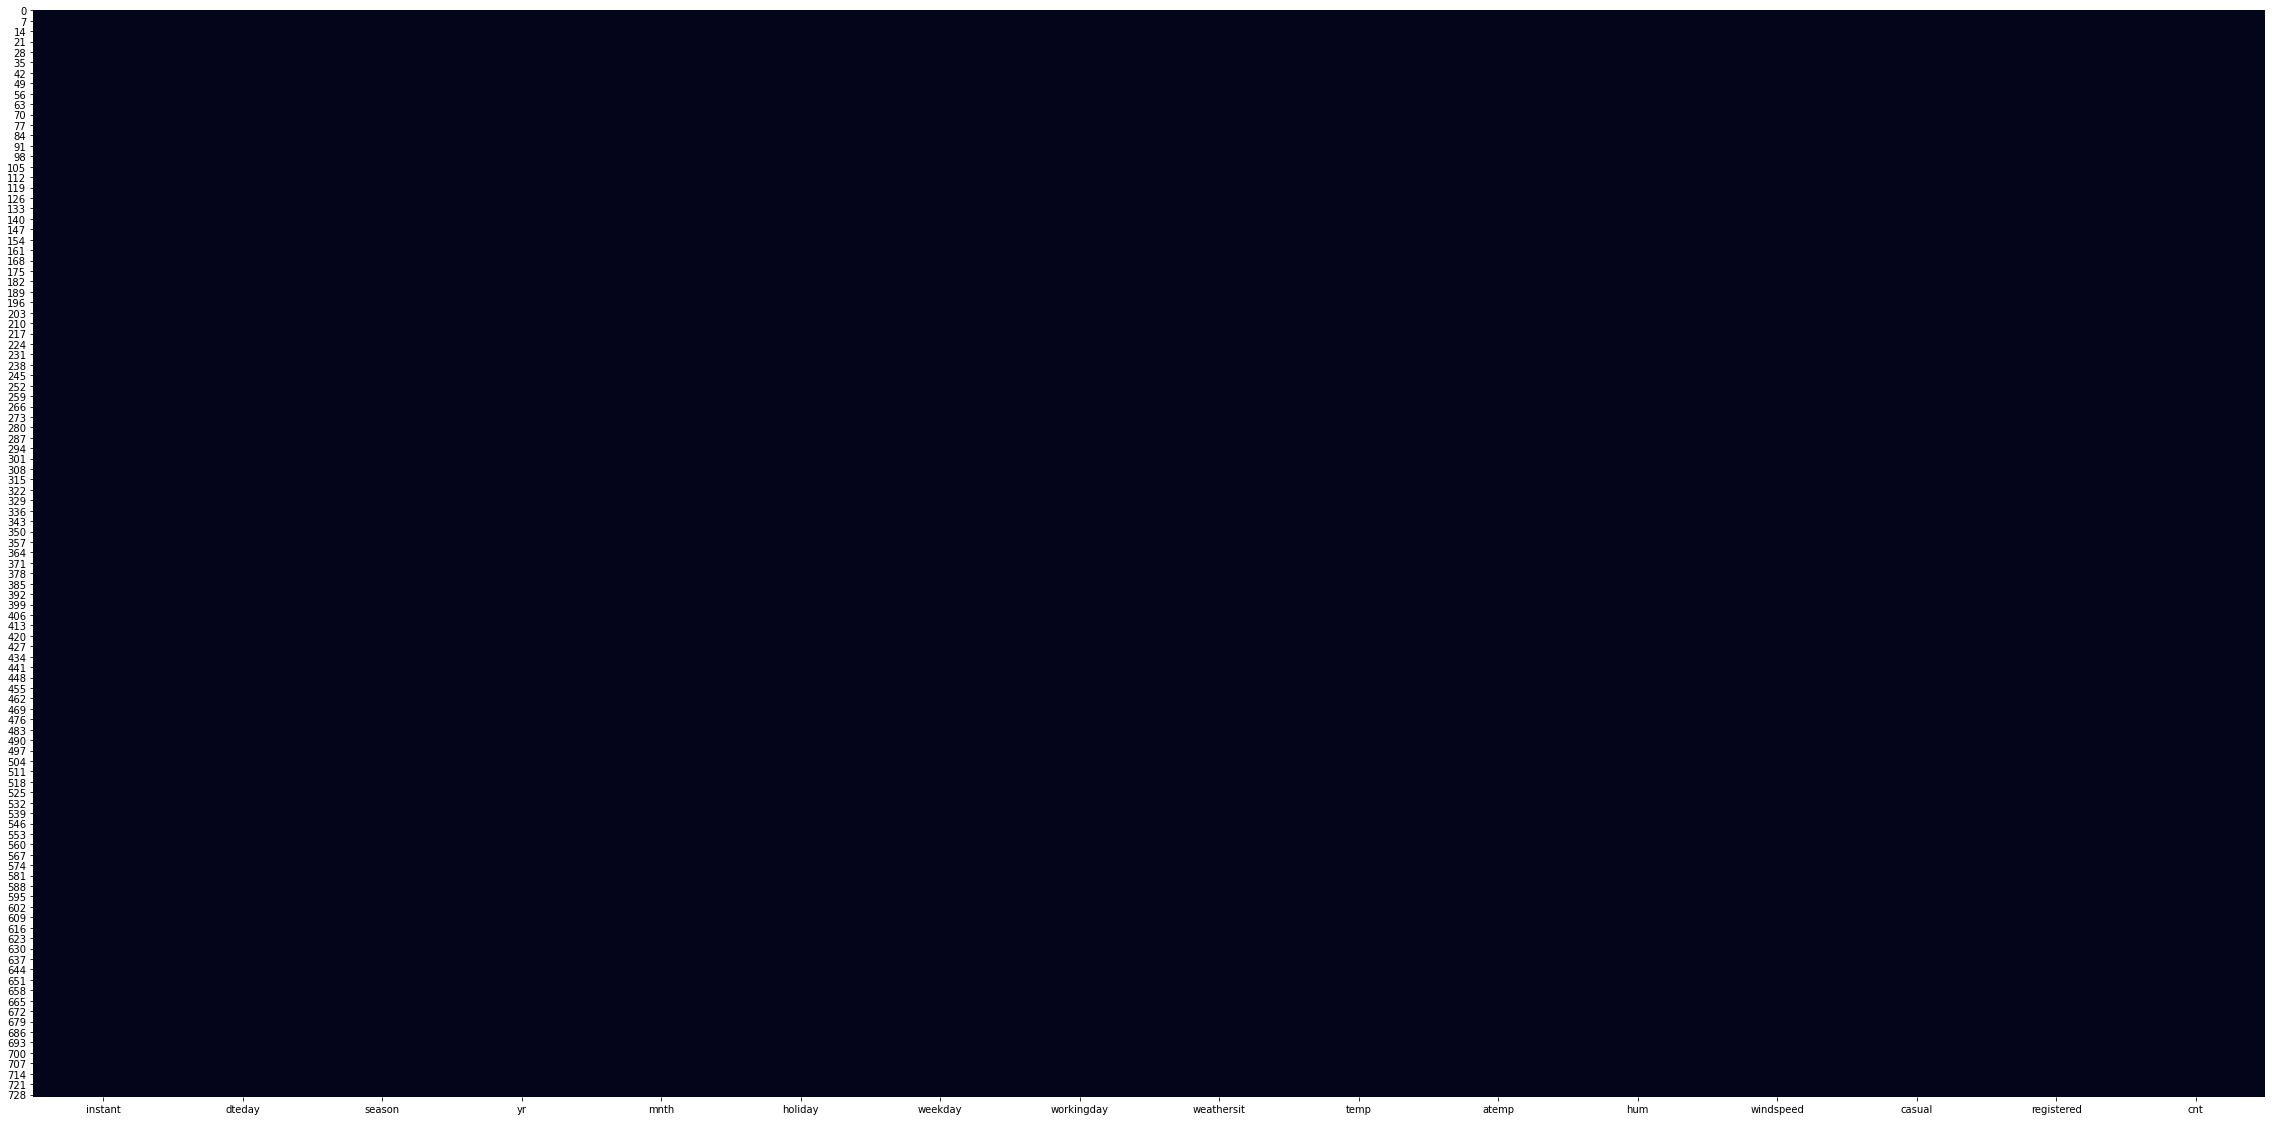

In [353]:
#plot heatmap to check to see missing values
plt.subplots(figsize=(40,20))
sns.heatmap(bike.isnull(), cbar=False)
plt.show()

In [354]:
#dump the missing value count
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<b> the dataset is clean and there is no missing values </b>

In [355]:
#drop the duplicate rows if any
dup_rows = bike[bike.duplicated()]
print(dup_rows.shape)

(0, 16)


<b> No Dulplicate Entry in the Dataset </b>

# Data Preparation and Cleaning

## Remove Unwanted columns

<b> 1. instant: it is just an index value which is not significant for our analysis <br>
    2. dteday : This is date, In the DataSet we already have column 'yr' and 'month' so we can date column <br>
    3. Casual : Casual Users count will not be useful <br>
    4. Registered : Registered users count also will not be useful <br>
        </b>

In [356]:
#dropping "instant", "dteday", "casual", "registered" colums 
del_list = ["instant", "dteday", "casual", "registered"]
bike = bike.drop(del_list, axis=1)

In [357]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [358]:
bike_orig = bike.copy()

### Create Dummy Variables

### Dummy Variable are categorical variables

In [359]:
#convert to categorical variable 
bike['season'] = bike['season'].astype('category')
bike['weathersit'] = bike['weathersit'].astype('category')
bike['mnth'] = bike['mnth'].astype('category')
bike['weekday'] = bike['weekday'].astype('category')

In [360]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [361]:
#Create dummies and Drops the orignal columns
bike = pd.get_dummies(bike, drop_first = True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [362]:
bike.shape

(730, 30)

### Split the data into Train and Test set 

In [363]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 333)

In [364]:
bike_train.shape

(510, 30)

In [365]:
bike_test.shape

(219, 30)

# Perform EDA by ploting the pair plots

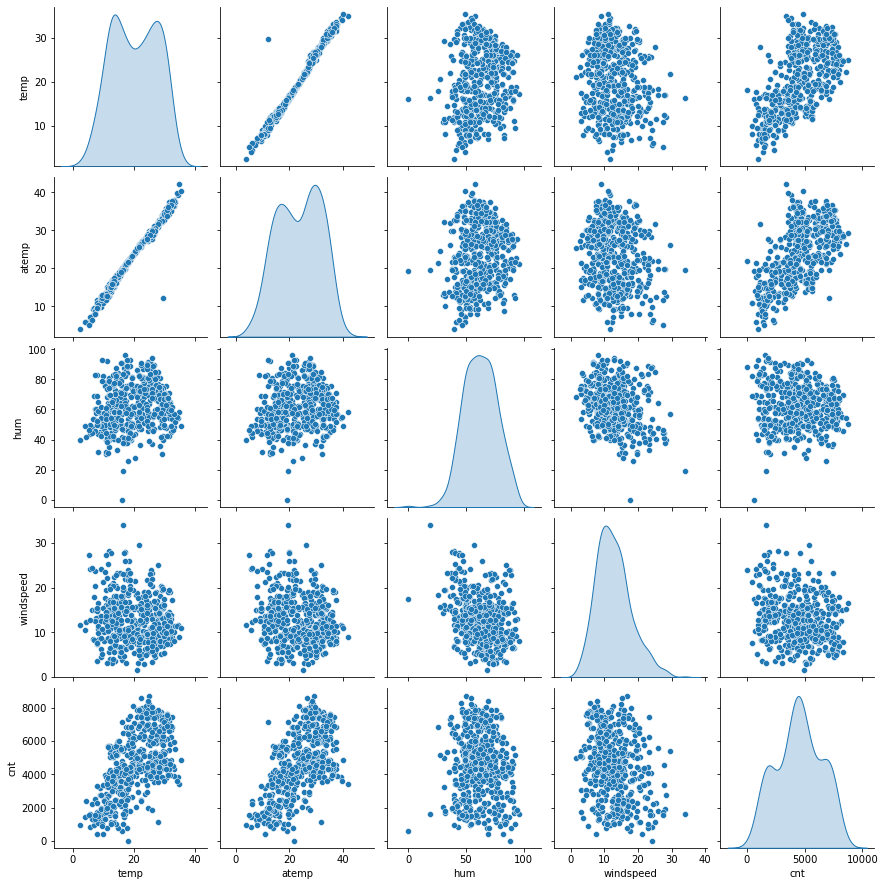

In [366]:
#plotting pair plot
bike_tmp = bike_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(bike_tmp, diag_kind = 'kde')
plt.show()

<b> temp, atemp is having high co-relation </br>
<b> temp, cnt also have hav decent co-relation </br> 
<b> atemp, cnt also have hav decent co-relation </br> 

# Plot box plot and understand the distribution mean and median

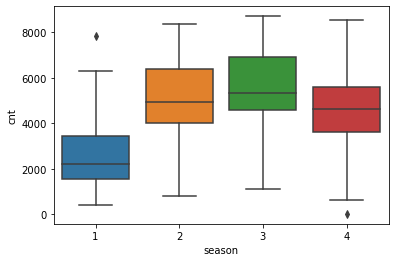

In [367]:
#plot box plot
sns.boxplot(data = bike_orig, x = 'season', y = 'cnt')
plt.show()

•	number of bike hired is very less in season spring compared to
Other seasons


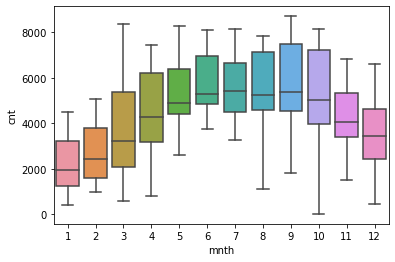

In [368]:
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_orig)
plt.show()

•	Number of bike hires are high in May-to-October months

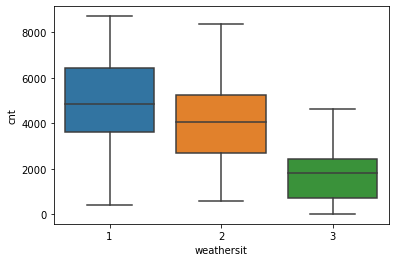

In [369]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_orig)
plt.show()

•	number of bike hired is very less in in weather situation 3 (i.e., when there Heavy Rain, ICE pallets, thunder storm, mist, snow and Fog)

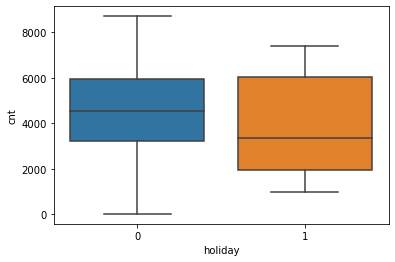

In [370]:
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_orig)
plt.show()

•	In Holidays, there is a dip in the number of bike hires

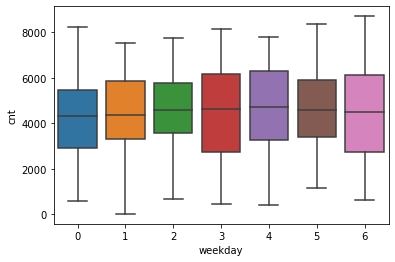

In [371]:
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_orig)
plt.show()



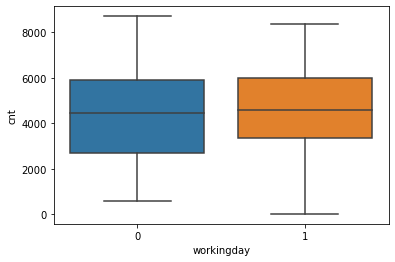

In [372]:
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_orig)
plt.show()

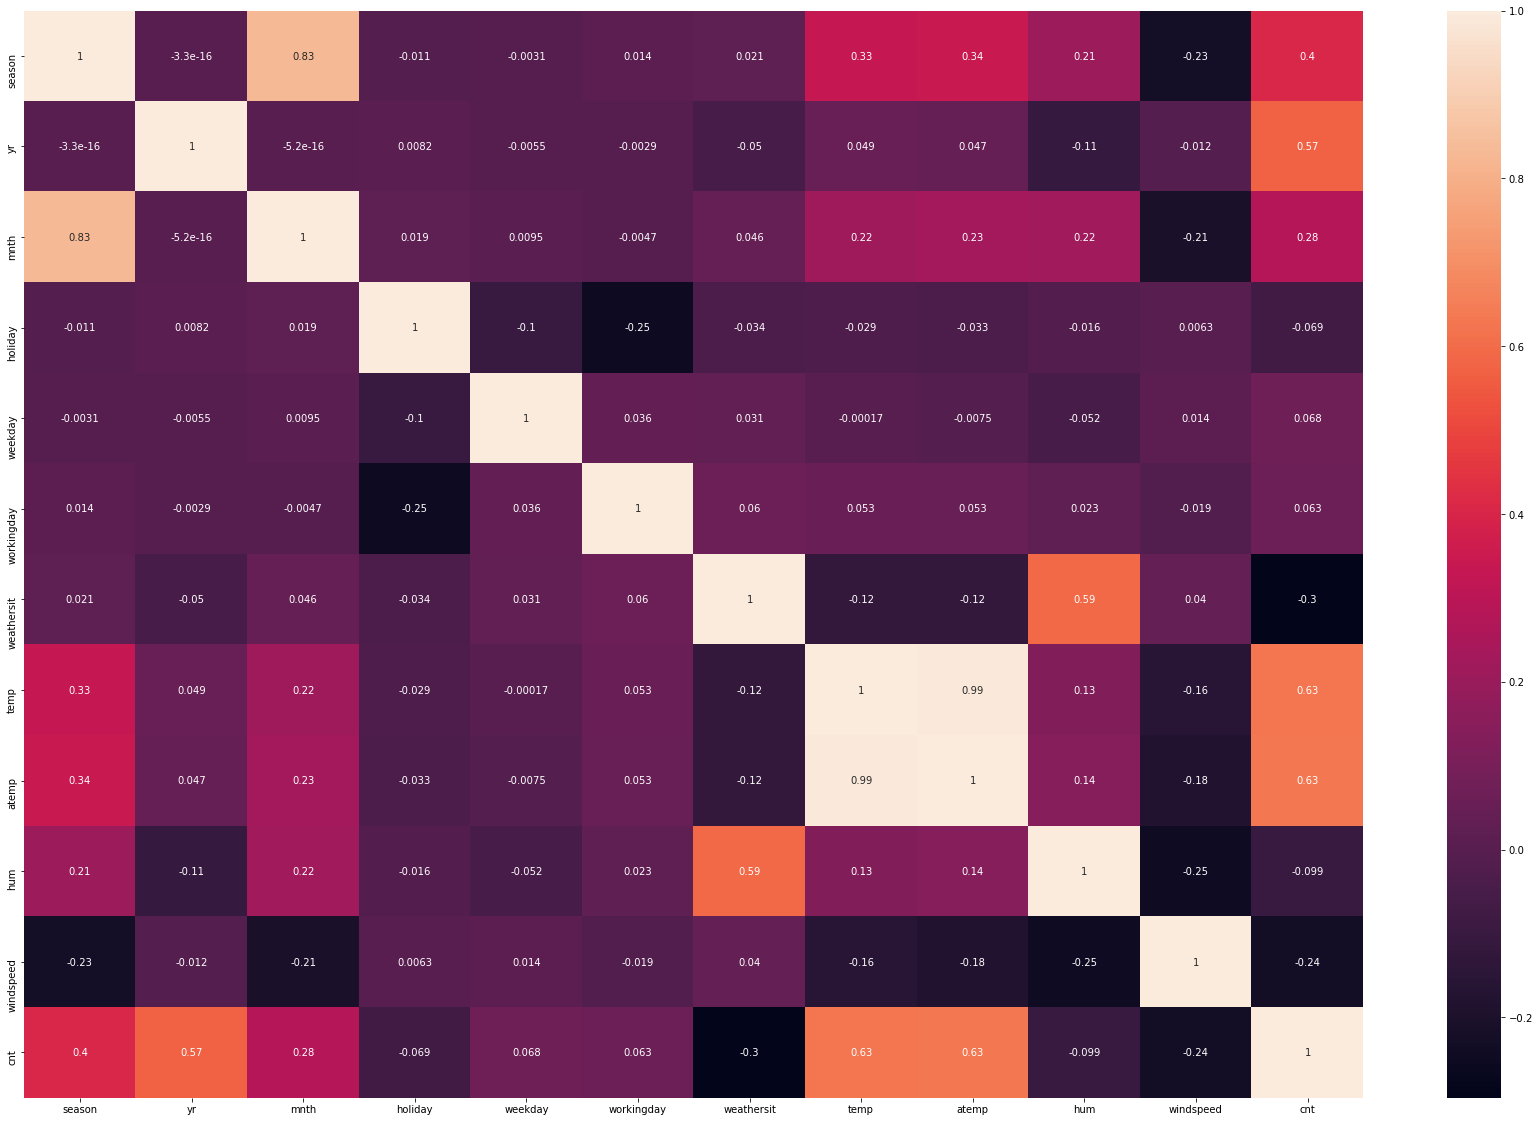

In [373]:
plt.figure(figsize = (30,20))
sns.heatmap(bike_orig.corr(), annot = True)
plt.show()

# Heat map shows the multicolinear relations with variables

#### Season, temp, atemp and yr has got the high positive correlation
#### holiday, weathersit windspeed has negative correlation

# Initial Steps
## Rescaling the feature (we will be using MinMaxscaler)
### we need to interpret the co-eficients so we need to rescale the numeric values

Chooseing MinMaxScaler scalling because brings all the data in the range of 0 to 1 </br>
formula: X = (x – x_min) / (x_max – x_min)


In [374]:
# Instantiate 
scaler = MinMaxScaler()

In [375]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [376]:
#create list of numeric variables
numeric_feature = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#fit transform
bike_train[numeric_feature] = scaler.fit_transform(bike_train[numeric_feature])

In [377]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [378]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Build model 

### Divide the given data into Train and Test data

## Build using 'STATS MODEL'

In [379]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [380]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,1,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,1,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [381]:
y_train.head()

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
Name: cnt, dtype: float64

In [382]:
import statsmodels.api as sm

## Building with all Variables just see how the model is behaving with all feature

In [383]:
#build model with all variable 
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     94.71
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          4.67e-176
Time:                        22:59:09   Log-Likelihood:                 517.04
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     481   BIC:                            -853.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1947      0.032      6.178      0.000       0.133       0.257
yr               0.2300      0.008     28.013      0.000       0.214       0.246
holiday          0.0022      0.025      0.089      0.929      -0.047       0.051
workingday       0.0319      0.010      3.331      0.001       0.013       0.051
temp             0.3524      0.142      2.477      0.014       0.073       0.632
atemp            0.1031      0.140      0.738      0.461      -0.171       0.378
hum             -0.1715      0.039     -4.422      0.000      -0.248      -0.095
windspeed       -0.1804      0.028     -6.333      0.000      -0.236      -0.124
season_2         0.1021      0.027      3.839      0.000       0.050       0.154
season_3         0.0906      0.031      2.943      0.003       0.030       0.151
season_4         0.1790      0.026      6.813      0.000       0.127       0.231
mnth_2           0.0157      0.020      0.785      0.433      -0.024       0.055
mnth_3           0.0672      0.023      2.896      0.004       0.022       0.113
mnth_4           0.0372      0.035      1.050      0.294      -0.032       0.107
mnth_5           0.0649      0.039      1.687      0.092      -0.011       0.141
mnth_6           0.0424      0.040      1.055      0.292      -0.037       0.122
mnth_7           0.0007      0.045      0.016      0.987      -0.087       0.088
mnth_8           0.0291      0.043      0.681      0.496      -0.055       0.113
mnth_9           0.1073      0.038      2.845      0.005       0.033       0.181
mnth_10          0.0456      0.035      1.311      0.191      -0.023       0.114
mnth_11         -0.0219      0.033     -0.665      0.507      -0.087       0.043
mnth_12         -0.0130      0.026     -0.495      0.621      -0.064       0.038
weekday_1       -0.0166      0.010     -1.619      0.106      -0.037       0.004
weekday_2        0.0032      0.011      0.283      0.777      -0.019       0.025
weekday_3        0.0169      0.011      1.561      0.119      -0.004       0.038
weekday_4        0.0128      0.011      1.128      0.260      -0.010       0.035
weekday_5        0.0178      0.011      1.613      0.107      -0.004       0.040
weekday_6        0.0538      0.015      3.621      0.000       0.025       0.083
weathersit_2    -0.0496      0.011     -4.615      0.000      -0.071      -0.028
weathersit_3    -0.2701      0.029     -9.388      0.000      -0.327      -0.214
==============================================================================
Omnibus:                       89.783   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.469
Skew:                          -0.880   Prob(JB):                     5.46e-51
Kurtosis:                       5.792   Cond. No.                     1.22e+16
===============

With all feature the model is giving alot of variable has High P value </br>
holiday has 0.929</br>
mnth_7 has 0.987</br>
weekday_2 has  	0.777</br>
mnth_12 has 0.621</br>


In [384]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weekday_4,inf
22,weekday_2,inf
2,workingday,inf
23,weekday_3,inf
1,holiday,inf
25,weekday_5,inf
21,weekday_1,inf
3,temp,434.95
4,atemp,378.25
5,hum,21.80


VIF show how the variables are correlated with target variable..
as we see in the output we see alot of "infinity" value which means that those have almost perfect correlation
And many featues has VIF value of more than 5. which is not desired

## RFE based linear regression model   

In [385]:
#Import RFE and Linear Regression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [386]:
lm = LinearRegression()
lm.fit(X_train, y_train)

#RFE model (pick top 15 variables for building the model)
rfe =RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 14),
 ('weekday_1', False, 6),
 ('weekday_2', False, 12),
 ('weekday_3', False, 10),
 ('weekday_4', False, 11),
 ('weekday_5', False, 9),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [387]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [388]:
#Based on RFE selected variable we need to train our model
X_train_rfe = X_train[col]

In [389]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,384.22
3,atemp,363.12
4,hum,17.52
7,season_3,7.09
5,windspeed,4.71
1,workingday,4.61
6,season_2,3.54
8,season_4,3.01
13,weathersit_2,2.14
0,yr,2.02


### VIF is very high for temp and atemp  

In [390]:
X_train_lm_1 = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

In [391]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          1.28e-186
Time:                        22:59:09   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576      0.000       0.137       0.254
yr               0.2287      0.008     28.013      0.000       0.213       0.245
workingday       0.0408      0.011      3.705      0.000       0.019       0.062
temp             0.4339      0.134      3.238      0.001       0.171       0.697
atemp            0.0586      0.137      0.427      0.670      -0.211       0.328
hum             -0.1784      0.037     -4.777      0.000      -0.252      -0.105
windspeed       -0.1849      0.028     -6.612      0.000      -0.240      -0.130
season_2         0.1302      0.015      8.575      0.000       0.100       0.160
season_3         0.0796      0.021      3.818      0.000       0.039       0.121
season_4         0.1535      0.014     10.765      0.000       0.125       0.181
mnth_3           0.0471      0.016      2.958      0.003       0.016       0.078
mnth_9           0.1000      0.016      6.303      0.000       0.069       0.131
mnth_10          0.0544      0.018      3.046      0.002       0.019       0.089
weekday_6        0.0546      0.014      3.818      0.000       0.027       0.083
weathersit_2    -0.0475      0.011     -4.455      0.000      -0.068      -0.027
weathersit_3    -0.2712      0.028     -9.542      0.000      -0.327      -0.215
==============================================================================
Omnibus:                       92.576   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.202
Skew:                          -0.933   Prob(JB):                     9.26e-49
Kurtosis:                       5.632   Cond. No.                         85.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Previous RFE model shows the we have High P value for 'atemp' of 0.670

In [392]:
#dropping the atemp column
X_train_data = X_train_rfe.drop(["atemp"], axis = 1)

In [393]:
#calculate VIF 
vif = pd.DataFrame()
vif['Features'] = X_train_data.columns
vif['VIF'] = [variance_inflation_factor(X_train_data.values, i) for i in range(X_train_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,23.21
3,hum,17.23
6,season_3,7.01
1,workingday,4.60
4,windspeed,4.55
5,season_2,3.54
7,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
11,weekday_6,1.79


### VIF for temp is still high. Temprature is key feature so retaining the temperature feature

In [394]:
# After deleting the atemp check the summary
X_train_lm_2 = sm.add_constant(X_train_data)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          1.00e-187
Time:                        22:59:09   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627      0.000       0.138       0.254
yr               0.2287      0.008     28.034      0.000       0.213       0.245
workingday       0.0408      0.011      3.706      0.000       0.019       0.062
temp             0.4893      0.034     14.595      0.000       0.423       0.555
hum             -0.1778      0.037     -4.769      0.000      -0.251      -0.105
windspeed       -0.1872      0.027     -6.823      0.000      -0.241      -0.133
season_2         0.1304      0.015      8.592      0.000       0.101       0.160
season_3         0.0787      0.021      3.797      0.000       0.038       0.119
season_4         0.1537      0.014     10.802      0.000       0.126       0.182
mnth_3           0.0473      0.016      2.971      0.003       0.016       0.079
mnth_9           0.1000      0.016      6.309      0.000       0.069       0.131
mnth_10          0.0544      0.018      3.052      0.002       0.019       0.089
weekday_6        0.0547      0.014      3.828      0.000       0.027       0.083
weathersit_2    -0.0476      0.011     -4.475      0.000      -0.069      -0.027
weathersit_3    -0.2715      0.028     -9.567      0.000      -0.327      -0.216
==============================================================================
Omnibus:                       92.002   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.387
Skew:                          -0.929   Prob(JB):                     2.29e-48
Kurtosis:                       5.622   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checked P value for all the variable looks okay.. 
VIF of hum 	17.23 which is high we should drop


In [395]:
#dropping hum because VIR of hum 	17.23
X_train_data = X_train_data.drop(["hum"], axis = 1)

#After dropping hum calculate VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_data.columns
vif['VIF'] = [variance_inflation_factor(X_train_data.values, i) for i in range(X_train_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)
X_train_lm_2 = sm.add_constant(X_train_data)
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
print(lr_2.summary())

        Features    VIF
2           temp  16.81
5       season_3   6.75
3      windspeed   4.27
1     workingday   4.11
4       season_2   3.51
6       season_4   2.89
0             yr   2.02
9        mnth_10   1.66
10     weekday_6   1.66
11  weathersit_2   1.54
8         mnth_9   1.27
7         mnth_3   1.20
12  weathersit_3   1.08
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          4.52e-184
Time:                        22:59:10   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                       

### P value for all the variable looks okay
VIF value for season_3   6.75 is > 5 we should drop

In [396]:
#dropping season_3 (VIF = 6.75)
X_train_data = X_train_data.drop(["season_3"], axis = 1)

In [397]:
#calculate the VIF again 
vif = pd.DataFrame()
vif['Features'] = X_train_data.columns
vif['VIF'] = [variance_inflation_factor(X_train_data.values, i) for i in range(X_train_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)
X_train_lm_3 = sm.add_constant(X_train_data)
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()
print(lr_3.summary())

        Features   VIF
2           temp  4.92
3      windspeed  4.15
1     workingday  4.07
0             yr  2.01
5       season_4  1.98
9      weekday_6  1.66
8        mnth_10  1.63
4       season_2  1.56
10  weathersit_2  1.54
7         mnth_9  1.23
6         mnth_3  1.15
11  weathersit_3  1.08
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          1.56e-181
Time:                        22:59:10   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                

# Outcome:
### VIF for all the variable is below 5
### P value for all the variable looks fine (i.e. below 0.05)
### This model seems to be good with very low Multicollinearity and the Predictor variables are significant and less Variance (VIF)



## Hypothesis Testing

 H0: B1 = B2 = Bn = 0 </br>
 H1: At lease one Bi != 0
    

In [398]:
#lr_3 model coeffients
lr_3.params

const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

<b> all the variables have Different Coefficients so we can say we can Reject the NULL Hypothesis

### F-Statistics

<b> F-Statistics is used to test overall significance of the model</b> <br>
<b>  F-statistic:                     200.2 </b> <br>
<b>  Prob (F-statistic):          1.56e-181 </b>

<b> cnt = 0.076726 + (yr × 0.231340) + (workingday × 0.042231) + (temp × 0.568327) − (windspeed × 0.153306) + (season2 × 0.083704) + (season4 ×0.119733) + (mnth9 × 0.102838) + (mnth10 x 0.041927) + (weekday6 × 0.056942) − (weathersit2 × 0.077340) − (weathersit3 × 0.316638)

<b> Interprtation of Coefficients:
    
    A Coefficient value of positive 'X' means that a unit increase in the corresponding variable will icrease the bike hire numbers by 'X' times
    (Directly propotional to the predicted variable)
    A Coefficient value of negative 'X' means that a unit increase in the corresponding variable will decrease the bike hire numbers by 'X' times
    (Indirectly propotional to the predicted variable)
  

## Assumptions

## Residual Analysis and Precdiction

In [399]:
y_train_pred = lr_3.predict(X_train_lm_3)

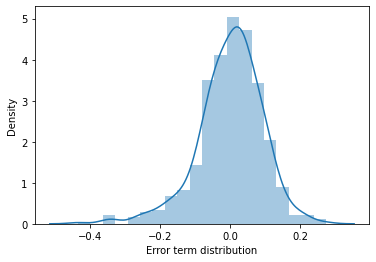

In [400]:
residual = y_train - y_train_pred
fig = plt.figure()
sns.distplot((residual), bins = 20)
plt.xlabel("Error term distribution")
plt.show()

<b> Residual value is distributed normally which denotes that the Linear Regression model is proper

In [401]:
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.07
0,yr,2.01
5,season_4,1.98
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


## Prediction using the Final Model

In [402]:
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_test[numeric_var] = scaler.transform(bike_test[numeric_var])

In [403]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [404]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [405]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [406]:
col1 = X_train_data.columns
X_test = X_test[col1]

X_test_lm_3 = sm.add_constant(X_test)

X_test_lm_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_3        219 non-null    uint8  
 8   mnth_9        219 non-null    uint8  
 9   mnth_10       219 non-null    uint8  
 10  weekday_6     219 non-null    uint8  
 11  weathersit_2  219 non-null    uint8  
 12  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 12.0 KB


In [407]:
y_pred = lr_3.predict(X_test_lm_3)


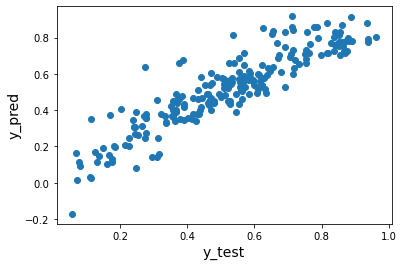

In [408]:
plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 14)                          # X-label
plt.ylabel('y_pred', fontsize = 14) 
plt.show()


In [409]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8189741744346875


In [410]:
# n is number of records in X_test
n = X_test.shape[0]

# Number of features (inaxis 1)
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)


0.8084289807124363


In [411]:
lr_3.params

const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

# CONCLUSION:

<b> The linear regression model suggest the following are the 3 major indicator to predict the bike hire </br>

   <b>Temp     : </b> Temperature with highest value of coefficient of '0.568327' indicates the a unit increase in temperature will increse the bike hires by 0.0568327 units.</br>
    <b>Yr      :</b> Year with second highest coefficient value indicate each year to year potential grow in the number of bike hire by '0.231340' units</br>
        <b>weathersit_3:</b> Weather situation 3 indicates the negative correlation means with a unit increase in weather_sit3 there is a decrease in the bike hire by 0.316638 units</br>
    

<b> To increase the number of Bike hire it is suggested to consider the above key features and also the follwing features

<b>windspeed: </b> A coefficient value of ‘-0.153306’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units. <br>
<b>season_4 (winter): </b>   A coefficient value of ‘0.119733’ indicated that w.r.t season_4, a unit increase in season_4 variable increases the bike hire numbers by 0.119733 units.